# Introduction
This is the first of our _analysis_ notebooks. Instead of gathering, cleaning and preparing data we will instead be generating new data.
In this notebook we will be finding the offensive and deffensive efficiency ratings of teams.

## Notebook Objective
The main aim of this notebook is to calculate some advanced statistics which are frequently used in the NBA to assess the performance of teams. We will start by calculating the number of possesions each team had per game. We will use this to then calculate the offensive efficiency rating, the defensive efficiency and the net efficiency of each team for each season.

## Learning Objective
The learning objective of this notebook is to learn about how the offensive, defensive and net efficiency of teams have changed over time.

# Setup

## Imports

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

# Parameters

In [3]:
BASIC_GAME_DATASET = 'C:/Users/User/OneDrive/Desktop/DSIP/NBAproject/data/processed/001_base_games.csv'

GAME_DETAILS_DATASET = 'C:/Users/User/OneDrive/Desktop/DSIP/NBAproject/data/processed/010_details.csv'

TEAMS_DATASET = 'C:/Users/User/OneDrive/Desktop/DSIP/NBAproject/data/raw/teams.csv'

EFFICIENCY_RATING_DATASET = 'C:/Users/User/OneDrive/Desktop/DSIP/NBAproject/data/processed/110_team_efficiency.csv'

TEAM_SEASONAL_EFFICIENCY_DATASET = 'C:/Users/User/OneDrive/Desktop/DSIP/NBAproject/data/processed/111_seasonal_efficiency.csv'

## Configuration 

In [4]:
%matplotlib inline

# Load/Combine Datasets

## Basic game data

In [5]:
basic_game = pd.read_csv(BASIC_GAME_DATASET, parse_dates=['GAME_DATE_EST'])
basic_game.shape, basic_game['GAME_ID'].nunique()

((23421, 21), 23421)

In [6]:
basic_game.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-12-19,12000047,Final,1610612753,1610612766,2020,1610612753,120.0,0.433,0.792,...,23.0,50.0,1610612766,117.0,0.444,0.864,0.439,21.0,52.0,1
1,2020-12-19,12000048,Final,1610612764,1610612765,2020,1610612764,99.0,0.427,0.625,...,24.0,45.0,1610612765,96.0,0.402,0.647,0.326,18.0,51.0,1
2,2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.400,0.744,...,21.0,43.0,1610612737,117.0,0.422,0.837,0.297,24.0,47.0,0
3,2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107.0,0.371,0.692,...,19.0,45.0,1610612755,113.0,0.533,0.629,0.355,23.0,48.0,0
4,2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105.0,0.380,0.737,...,27.0,37.0,1610612748,117.0,0.534,0.741,0.514,30.0,51.0,0


In [7]:
basic_game.dtypes

GAME_DATE_EST       datetime64[ns]
GAME_ID                      int64
GAME_STATUS_TEXT            object
HOME_TEAM_ID                 int64
VISITOR_TEAM_ID              int64
SEASON                       int64
TEAM_ID_home                 int64
PTS_home                   float64
FG_PCT_home                float64
FT_PCT_home                float64
FG3_PCT_home               float64
AST_home                   float64
REB_home                   float64
TEAM_ID_away                 int64
PTS_away                   float64
FG_PCT_away                float64
FT_PCT_away                float64
FG3_PCT_away               float64
AST_away                   float64
REB_away                   float64
HOME_TEAM_WINS               int64
dtype: object

## Advanced game data

In [8]:
advanced_game = pd.read_csv(GAME_DETAILS_DATASET)
advanced_game.shape, advanced_game['GAME_ID'].nunique()

((46843, 22), 23421)

In [9]:
advanced_game.head()

,GAME_ID,TEAM_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON
0,10300001,1610612742,34.0,76.0,0.447368,2.0,8.0,0.250000,15.0,30.0,...,26.0,38.0,20.0,9.0,4.0,18.0,34.0,85.0,0.0,2003
1,10300001,1610612762,32.0,70.0,0.457143,1.0,7.0,0.142857,25.0,34.0,...,32.0,41.0,23.0,8.0,4.0,18.0,26.0,90.0,0.0,2003
2,10300002,1610612749,32.0,75.0,0.426667,2.0,13.0,0.153846,28.0,40.0,...,32.0,43.0,20.0,9.0,4.0,24.0,26.0,94.0,0.0,2003
3,10300002,1610612763,40.0,81.0,0.493827,4.0,15.0,0.266667,21.0,34.0,...,34.0,48.0,25.0,18.0,7.0,25.0,35.0,105.0,0.0,2003
4,10300003,1610612739,38.0,77.0,0.493506,4.0,6.0,0.666667,20.0,29.0,...,40.0,52.0,25.0,10.0,7.0,25.0,33.0,100.0,0.0,2003


In [10]:
advanced_game.dtypes

GAME_ID         int64
TEAM_ID         int64
FGM           float64
FGA           float64
FG_PCT        float64
FG3M          float64
FG3A          float64
FG3_PCT       float64
FTM           float64
FTA           float64
FT_PCT        float64
OREB          float64
DREB          float64
REB           float64
AST           float64
STL           float64
BLK           float64
TO            float64
PF            float64
PTS           float64
PLUS_MINUS    float64
SEASON          int64
dtype: object

# Offensive Efficiency
Offensive efficiency is a widely used statistic in basketball. A teams offensive efficiency rating is the number of points a team is expected to score per 100 team possesions.
## Possessions
Before we can calculate offensive efficiency rating we first need to calculate the number of possesions per game. Here is a simple, commonly used formula, to calculate a teams number of possesions in a game.<br>
Possessions=0.96\*\[(Field Goal Attempts)+(Turnovers)+0.44*(Free Throw Attempts)-(Offensive Rebounds)\] <br><br>
Here is an explanation of this formula from [NBA Stuffer](https://www.nbastuffer.com/analytics101/possession/):<br>
"It counts as a team possession every time when a player of that team;
<br>(1) attempts a field goal,
<br>(2) misses a shot and does not get the offensive rebound,
<br>(3) turns the ball over (some sources add “turnovers that are assigned to teams” for a more precise possession calculation),
<br>(4) goes to the line for two or three shots and either makes the last shot or does not get the rebound of a missed last shot."
<br><br>NBA Stuffer also explains where the 0.44 and 0.96 comes from:<br>
".44 multiplier has to be taken into account because not all free throws take up a possession... Research has determined that about 44% of all free throws take up possessions. The .96 multiplier accounts for team offensive rebounds in situations where a missed shot is tipped out of bounds by a defensive player, continuing the possession without an offensive rebound being credited."

In [11]:
advanced_game['POSSESSIONS'] = round(0.96*(advanced_game['FGA'] + advanced_game['TO'] + 0.44*advanced_game['FTA'] - advanced_game['OREB']) )
advanced_game.head(5)

,GAME_ID,TEAM_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,POSSESSIONS
0,10300001,1610612742,34.0,76.0,0.447368,2.0,8.0,0.250000,15.0,30.0,...,38.0,20.0,9.0,4.0,18.0,34.0,85.0,0.0,2003,91.0
1,10300001,1610612762,32.0,70.0,0.457143,1.0,7.0,0.142857,25.0,34.0,...,41.0,23.0,8.0,4.0,18.0,26.0,90.0,0.0,2003,90.0
2,10300002,1610612749,32.0,75.0,0.426667,2.0,13.0,0.153846,28.0,40.0,...,43.0,20.0,9.0,4.0,24.0,26.0,94.0,0.0,2003,101.0
3,10300002,1610612763,40.0,81.0,0.493827,4.0,15.0,0.266667,21.0,34.0,...,48.0,25.0,18.0,7.0,25.0,35.0,105.0,0.0,2003,103.0
4,10300003,1610612739,38.0,77.0,0.493506,4.0,6.0,0.666667,20.0,29.0,...,52.0,25.0,10.0,7.0,25.0,33.0,100.0,0.0,2003,99.0


Now that possessions have been calculated it is very simple to find offensive efficiency rating. First we find points per possession(PPP) then multiply this by 100 to get offensive efficiency rating(OER).

In [12]:
advanced_game['PPP'] = advanced_game['PTS']/advanced_game['POSSESSIONS']
advanced_game.head(5)

,GAME_ID,TEAM_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,POSSESSIONS,PPP
0,10300001,1610612742,34.0,76.0,0.447368,2.0,8.0,0.250000,15.0,30.0,...,20.0,9.0,4.0,18.0,34.0,85.0,0.0,2003,91.0,0.934066
1,10300001,1610612762,32.0,70.0,0.457143,1.0,7.0,0.142857,25.0,34.0,...,23.0,8.0,4.0,18.0,26.0,90.0,0.0,2003,90.0,1.000000
2,10300002,1610612749,32.0,75.0,0.426667,2.0,13.0,0.153846,28.0,40.0,...,20.0,9.0,4.0,24.0,26.0,94.0,0.0,2003,101.0,0.930693
3,10300002,1610612763,40.0,81.0,0.493827,4.0,15.0,0.266667,21.0,34.0,...,25.0,18.0,7.0,25.0,35.0,105.0,0.0,2003,103.0,1.019417
4,10300003,1610612739,38.0,77.0,0.493506,4.0,6.0,0.666667,20.0,29.0,...,25.0,10.0,7.0,25.0,33.0,100.0,0.0,2003,99.0,1.010101


In [13]:
advanced_game['OER'] = 100*advanced_game['PPP']
advanced_game.head(5)

,GAME_ID,TEAM_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,POSSESSIONS,PPP,OER
0,10300001,1610612742,34.0,76.0,0.447368,2.0,8.0,0.250000,15.0,30.0,...,9.0,4.0,18.0,34.0,85.0,0.0,2003,91.0,0.934066,93.406593
1,10300001,1610612762,32.0,70.0,0.457143,1.0,7.0,0.142857,25.0,34.0,...,8.0,4.0,18.0,26.0,90.0,0.0,2003,90.0,1.000000,100.000000
2,10300002,1610612749,32.0,75.0,0.426667,2.0,13.0,0.153846,28.0,40.0,...,9.0,4.0,24.0,26.0,94.0,0.0,2003,101.0,0.930693,93.069307
3,10300002,1610612763,40.0,81.0,0.493827,4.0,15.0,0.266667,21.0,34.0,...,18.0,7.0,25.0,35.0,105.0,0.0,2003,103.0,1.019417,101.941748
4,10300003,1610612739,38.0,77.0,0.493506,4.0,6.0,0.666667,20.0,29.0,...,10.0,7.0,25.0,33.0,100.0,0.0,2003,99.0,1.010101,101.010101


# Defensive Efficiency
Defensive Efficiency is calculated in a similar way to offensive efficiency. Defensive Efficiency Rating is the number of points a team allows per 100 possesions. The lower a teams DER, the better.
## Add home and away data to Efficiency dataset
To find the number of points the opponent scored we need to merge our base game dataset to our advanced game dataset. The only columns we need to take from base game are 'PTS_home' and 'PTS_away' but we'll add in 'GAME_DATE_EST' just in case we ever want to find the date of certain games.

In [14]:
efficiency = advanced_game.merge(basic_game[['GAME_ID','GAME_DATE_EST', 'PTS_home', 'PTS_away']], how='inner', on=['GAME_ID'])

# The resulting df should be no larger than the advanced_game df.
assert len(efficiency)<= len(advanced_game)

efficiency.shape, efficiency['GAME_ID'].nunique()

((46843, 28), 23421)

In [15]:
efficiency.head()

,GAME_ID,TEAM_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,PF,PTS,PLUS_MINUS,SEASON,POSSESSIONS,PPP,OER,GAME_DATE_EST,PTS_home,PTS_away
0,10300001,1610612742,34.0,76.0,0.447368,2.0,8.0,0.250000,15.0,30.0,...,34.0,85.0,0.0,2003,91.0,0.934066,93.406593,2003-10-05,90.0,85.0
1,10300001,1610612762,32.0,70.0,0.457143,1.0,7.0,0.142857,25.0,34.0,...,26.0,90.0,0.0,2003,90.0,1.000000,100.000000,2003-10-05,90.0,85.0
2,10300002,1610612749,32.0,75.0,0.426667,2.0,13.0,0.153846,28.0,40.0,...,26.0,94.0,0.0,2003,101.0,0.930693,93.069307,2003-10-06,105.0,94.0
3,10300002,1610612763,40.0,81.0,0.493827,4.0,15.0,0.266667,21.0,34.0,...,35.0,105.0,0.0,2003,103.0,1.019417,101.941748,2003-10-06,105.0,94.0
4,10300003,1610612739,38.0,77.0,0.493506,4.0,6.0,0.666667,20.0,29.0,...,33.0,100.0,0.0,2003,99.0,1.010101,101.010101,2003-10-07,96.0,100.0


## Add opponents points
We can now use this data to find the number of points the opponent scored in the game.

In [16]:
for index,game in efficiency.iterrows():
    if game['PTS'] == game['PTS_home']:
        efficiency.loc[index,'OPP_PTS'] = game['PTS_away']
        efficiency.loc[index,'HOME'] = True
    else:
        efficiency.loc[index,'OPP_PTS'] = game['PTS_home']
        efficiency.loc[index,'HOME'] = False

In [17]:
efficiency.head()

,GAME_ID,TEAM_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,PLUS_MINUS,SEASON,POSSESSIONS,PPP,OER,GAME_DATE_EST,PTS_home,PTS_away,OPP_PTS,HOME
0,10300001,1610612742,34.0,76.0,0.447368,2.0,8.0,0.250000,15.0,30.0,...,0.0,2003,91.0,0.934066,93.406593,2003-10-05,90.0,85.0,90.0,False
1,10300001,1610612762,32.0,70.0,0.457143,1.0,7.0,0.142857,25.0,34.0,...,0.0,2003,90.0,1.000000,100.000000,2003-10-05,90.0,85.0,85.0,True
2,10300002,1610612749,32.0,75.0,0.426667,2.0,13.0,0.153846,28.0,40.0,...,0.0,2003,101.0,0.930693,93.069307,2003-10-06,105.0,94.0,105.0,False
3,10300002,1610612763,40.0,81.0,0.493827,4.0,15.0,0.266667,21.0,34.0,...,0.0,2003,103.0,1.019417,101.941748,2003-10-06,105.0,94.0,94.0,True
4,10300003,1610612739,38.0,77.0,0.493506,4.0,6.0,0.666667,20.0,29.0,...,0.0,2003,99.0,1.010101,101.010101,2003-10-07,96.0,100.0,96.0,False


We can now remove some unwanted columns

In [18]:
efficiency.columns

Index(['GAME_ID', 'TEAM_ID', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TO', 'PF', 'PTS', 'PLUS_MINUS', 'SEASON', 'POSSESSIONS', 'PPP', 'OER',
       'GAME_DATE_EST', 'PTS_home', 'PTS_away', 'OPP_PTS', 'HOME'],
      dtype='object')

In [19]:
cleaned_efficiency = efficiency.copy()
cleaned_efficiency.drop(columns=['PTS_home', 'PTS_away', 'PLUS_MINUS'], inplace=True)
cleaned_efficiency.head()

,GAME_ID,TEAM_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,TO,PF,PTS,SEASON,POSSESSIONS,PPP,OER,GAME_DATE_EST,OPP_PTS,HOME
0,10300001,1610612742,34.0,76.0,0.447368,2.0,8.0,0.250000,15.0,30.0,...,18.0,34.0,85.0,2003,91.0,0.934066,93.406593,2003-10-05,90.0,False
1,10300001,1610612762,32.0,70.0,0.457143,1.0,7.0,0.142857,25.0,34.0,...,18.0,26.0,90.0,2003,90.0,1.000000,100.000000,2003-10-05,85.0,True
2,10300002,1610612749,32.0,75.0,0.426667,2.0,13.0,0.153846,28.0,40.0,...,24.0,26.0,94.0,2003,101.0,0.930693,93.069307,2003-10-06,105.0,False
3,10300002,1610612763,40.0,81.0,0.493827,4.0,15.0,0.266667,21.0,34.0,...,25.0,35.0,105.0,2003,103.0,1.019417,101.941748,2003-10-06,94.0,True
4,10300003,1610612739,38.0,77.0,0.493506,4.0,6.0,0.666667,20.0,29.0,...,25.0,33.0,100.0,2003,99.0,1.010101,101.010101,2003-10-07,96.0,False


I want to rearrange the columns in to an order that makes more sense to me.

In [20]:
cleaned_efficiency.columns

Index(['GAME_ID', 'TEAM_ID', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TO', 'PF', 'PTS', 'SEASON', 'POSSESSIONS', 'PPP', 'OER',
       'GAME_DATE_EST', 'OPP_PTS', 'HOME'],
      dtype='object')

In [21]:
columns_order = ['GAME_DATE_EST', 'SEASON', 'GAME_ID', 'TEAM_ID', 'HOME', 
                 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
                 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO',
                 'PF', 'PTS', 'POSSESSIONS', 'PPP', 'OER', 'OPP_PTS']

In [22]:
cleaned_efficiency = cleaned_efficiency[columns_order]
cleaned_efficiency

,GAME_DATE_EST,SEASON,GAME_ID,TEAM_ID,HOME,FGM,FGA,FG_PCT,FG3M,FG3A,...,AST,STL,BLK,TO,PF,PTS,POSSESSIONS,PPP,OER,OPP_PTS
0,2003-10-05,2003,10300001,1610612742,False,34.0,76.0,0.447368,2.0,8.0,...,20.0,9.0,4.0,18.0,34.0,85.0,91.0,0.934066,93.406593,90.0
1,2003-10-05,2003,10300001,1610612762,True,32.0,70.0,0.457143,1.0,7.0,...,23.0,8.0,4.0,18.0,26.0,90.0,90.0,1.000000,100.000000,85.0
2,2003-10-06,2003,10300002,1610612749,False,32.0,75.0,0.426667,2.0,13.0,...,20.0,9.0,4.0,24.0,26.0,94.0,101.0,0.930693,93.069307,105.0
3,2003-10-06,2003,10300002,1610612763,True,40.0,81.0,0.493827,4.0,15.0,...,25.0,18.0,7.0,25.0,35.0,105.0,103.0,1.019417,101.941748,94.0
4,2003-10-07,2003,10300003,1610612739,False,38.0,77.0,0.493506,4.0,6.0,...,25.0,10.0,7.0,25.0,33.0,100.0,99.0,1.010101,101.010101,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46838,2020-10-09,2019,41900405,1610612748,False,38.0,83.0,0.457831,14.0,33.0,...,26.0,7.0,3.0,13.0,19.0,111.0,93.0,1.193548,119.354839,108.0
46839,2020-10-11,2019,41900406,1610612747,False,43.0,89.0,0.483146,11.0,35.0,...,23.0,5.0,4.0,12.0,22.0,106.0,91.0,1.164835,116.483516,93.0
46840,2020-10-11,2019,41900406,1610612748,True,35.0,79.0,0.443038,10.0,28.0,...,25.0,4.0,4.0,13.0,18.0,93.0,89.0,1.044944,104.494382,106.0
46841,2020-08-15,2019,51900111,1610612757,True,38.0,84.0,0.452381,15.0,40.0,...,20.0,12.0,7.0,13.0,19.0,126.0,102.0,1.235294,123.529412,122.0


At last we can calculate the teams defensive efficiency rating. First we get the opponents points per possession (OPP_PPP) then we can get defensive efficiency rating (DER).

In [23]:
cleaned_efficiency['OPP_PPP'] = cleaned_efficiency['OPP_PTS']/cleaned_efficiency['POSSESSIONS']
cleaned_efficiency.head(5)

,GAME_DATE_EST,SEASON,GAME_ID,TEAM_ID,HOME,FGM,FGA,FG_PCT,FG3M,FG3A,...,STL,BLK,TO,PF,PTS,POSSESSIONS,PPP,OER,OPP_PTS,OPP_PPP
0,2003-10-05,2003,10300001,1610612742,False,34.0,76.0,0.447368,2.0,8.0,...,9.0,4.0,18.0,34.0,85.0,91.0,0.934066,93.406593,90.0,0.989011
1,2003-10-05,2003,10300001,1610612762,True,32.0,70.0,0.457143,1.0,7.0,...,8.0,4.0,18.0,26.0,90.0,90.0,1.000000,100.000000,85.0,0.944444
2,2003-10-06,2003,10300002,1610612749,False,32.0,75.0,0.426667,2.0,13.0,...,9.0,4.0,24.0,26.0,94.0,101.0,0.930693,93.069307,105.0,1.039604
3,2003-10-06,2003,10300002,1610612763,True,40.0,81.0,0.493827,4.0,15.0,...,18.0,7.0,25.0,35.0,105.0,103.0,1.019417,101.941748,94.0,0.912621
4,2003-10-07,2003,10300003,1610612739,False,38.0,77.0,0.493506,4.0,6.0,...,10.0,7.0,25.0,33.0,100.0,99.0,1.010101,101.010101,96.0,0.969697


In [24]:
cleaned_efficiency['DER'] = 100*cleaned_efficiency['OPP_PPP']
cleaned_efficiency.head(5)

,GAME_DATE_EST,SEASON,GAME_ID,TEAM_ID,HOME,FGM,FGA,FG_PCT,FG3M,FG3A,...,BLK,TO,PF,PTS,POSSESSIONS,PPP,OER,OPP_PTS,OPP_PPP,DER
0,2003-10-05,2003,10300001,1610612742,False,34.0,76.0,0.447368,2.0,8.0,...,4.0,18.0,34.0,85.0,91.0,0.934066,93.406593,90.0,0.989011,98.901099
1,2003-10-05,2003,10300001,1610612762,True,32.0,70.0,0.457143,1.0,7.0,...,4.0,18.0,26.0,90.0,90.0,1.000000,100.000000,85.0,0.944444,94.444444
2,2003-10-06,2003,10300002,1610612749,False,32.0,75.0,0.426667,2.0,13.0,...,4.0,24.0,26.0,94.0,101.0,0.930693,93.069307,105.0,1.039604,103.960396
3,2003-10-06,2003,10300002,1610612763,True,40.0,81.0,0.493827,4.0,15.0,...,7.0,25.0,35.0,105.0,103.0,1.019417,101.941748,94.0,0.912621,91.262136
4,2003-10-07,2003,10300003,1610612739,False,38.0,77.0,0.493506,4.0,6.0,...,7.0,25.0,33.0,100.0,99.0,1.010101,101.010101,96.0,0.969697,96.969697


# Net Efficiency

Finally we can get a teams Net Efficiency Rating (NER). This is simply a teams OER - DER.

In [25]:
cleaned_efficiency['NER'] = cleaned_efficiency['OER'] - cleaned_efficiency['DER']
cleaned_efficiency.head(5)

,GAME_DATE_EST,SEASON,GAME_ID,TEAM_ID,HOME,FGM,FGA,FG_PCT,FG3M,FG3A,...,TO,PF,PTS,POSSESSIONS,PPP,OER,OPP_PTS,OPP_PPP,DER,NER
0,2003-10-05,2003,10300001,1610612742,False,34.0,76.0,0.447368,2.0,8.0,...,18.0,34.0,85.0,91.0,0.934066,93.406593,90.0,0.989011,98.901099,-5.494505
1,2003-10-05,2003,10300001,1610612762,True,32.0,70.0,0.457143,1.0,7.0,...,18.0,26.0,90.0,90.0,1.000000,100.000000,85.0,0.944444,94.444444,5.555556
2,2003-10-06,2003,10300002,1610612749,False,32.0,75.0,0.426667,2.0,13.0,...,24.0,26.0,94.0,101.0,0.930693,93.069307,105.0,1.039604,103.960396,-10.891089
3,2003-10-06,2003,10300002,1610612763,True,40.0,81.0,0.493827,4.0,15.0,...,25.0,35.0,105.0,103.0,1.019417,101.941748,94.0,0.912621,91.262136,10.679612
4,2003-10-07,2003,10300003,1610612739,False,38.0,77.0,0.493506,4.0,6.0,...,25.0,33.0,100.0,99.0,1.010101,101.010101,96.0,0.969697,96.969697,4.040404


These statistics are not very enlightening in a single game but over a season they can give us a very good idea of how teams performed. To make things easier to read we first want to add team names to our dataset.

In [26]:
teams = pd.read_csv(TEAMS_DATASET).set_index(['TEAM_ID'])
teams.shape

(30, 13)

In [27]:
teams.head()

,LEAGUE_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
TEAM_ID,,,,,,,,,,,,,
1610612737,0,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1610612738,0,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
1610612740,0,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
1610612741,0,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
1610612742,0,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [28]:
team_dict = {}
for team in teams.iterrows():
    team_dict[team[0]] = team[1]['NICKNAME']
team_dict

{1610612737: 'Hawks',
 1610612738: 'Celtics',
 1610612740: 'Pelicans',
 1610612741: 'Bulls',
 1610612742: 'Mavericks',
 1610612743: 'Nuggets',
 1610612745: 'Rockets',
 1610612746: 'Clippers',
 1610612747: 'Lakers',
 1610612748: 'Heat',
 1610612749: 'Bucks',
 1610612750: 'Timberwolves',
 1610612751: 'Nets',
 1610612752: 'Knicks',
 1610612753: 'Magic',
 1610612754: 'Pacers',
 1610612755: '76ers',
 1610612756: 'Suns',
 1610612757: 'Trail Blazers',
 1610612758: 'Kings',
 1610612759: 'Spurs',
 1610612760: 'Thunder',
 1610612761: 'Raptors',
 1610612762: 'Jazz',
 1610612763: 'Grizzlies',
 1610612764: 'Wizards',
 1610612765: 'Pistons',
 1610612766: 'Hornets',
 1610612739: 'Cavaliers',
 1610612744: 'Warriors'}

In [29]:
cleaned_efficiency['TEAM_NAME'] = cleaned_efficiency['TEAM_ID'].map(team_dict)

In [30]:
season_cleaned_efficiency = cleaned_efficiency.groupby(['SEASON', 'TEAM_ID', 'TEAM_NAME']).sum()
season_cleaned_efficiency

GAME_ID     FGM     FGA     FG_PCT   FG3M  \
SEASON TEAM_ID    TEAM_NAME                                                 
2003   1610612737 Hawks      1674947672  2857.0  6609.0  35.909819  422.0   
       1610612738 Celtics    1836147889  2994.0  6775.0  38.505063  577.0   
       1610612739 Cavaliers  1685248550  2992.0  6903.0  36.569321  254.0   
       1610612740 Pelicans   1957049156  3016.0  7213.0  37.775835  579.0   
       1610612741 Bulls      1674948644  2819.0  6799.0  34.571030  431.0   
...                                 ...     ...     ...        ...    ...   
2020   1610612762 Jazz         36000073   118.0   248.0   1.421172   53.0   
       1610612763 Grizzlies    48000117   166.0   368.0   1.799759   60.0   
       1610612764 Wizards      36000095   111.0   264.0   1.257392   36.0   
       1610612765 Pistons      48000098   132.0   322.0   1.642022   49.0   
       1610612766 Hornets      48000105   157.0   353.0   1.771544   58.0   

                               FG3A    FG3_PCT     FTM     FTA     FT_PCT  \
SEASON TEAM_ID    TEAM_NAME                                                 
2003   1610612737 Hawks      1256.0  26.667013  1555.0  2004.0  64.053018   
       1610612738 Celtics    1676.0  29.612346  1673.0  2229.0  65.826035   
       1610612739 Cavaliers   804.0  26.959395  1564.0  2087.0  62.653435   
       1610612740 Pelicans   1806.0  29.163632  1585.0  2108.0  67.692073   
       1610612741 Bulls      1259.0  29.086042  1340.0  1848.0  60.021770   
...                             ...        ...     ...     ...        ...   
2020   1610612762 Jazz        132.0   1.183865    66.0    83.0   2.327733   
       1610612763 Grizzlies   171.0   1.384167    82.0   115.0   2.857130   
       1610612764 Wizards     115.0   0.938539    41.0    60.0   2.034091   
       1610612765 Pistons     150.0   1.325354    63.0    88.0   2.786863   
       1610612766 Hornets     147.0   1.556210    77.0   105.0   3.116533   

                             ...      TO      PF     PTS  POSSESSIONS  \
SEASON TEAM_ID    TEAM_NAME  ...                                        
2003   1610612737 Hawks      ...  1292.0  1853.0  7691.0       7467.0   
       1610612738 Celtics    ...  1391.0  1952.0  8238.0       7917.0   
       1610612739 Cavaliers  ...  1207.0  1801.0  7802.0       7576.0   
       1610612740 Pelicans   ...  1282.0  1882.0  8196.0       7903.0   
       1610612741 Bulls      ...  1264.0  1932.0  7409.0       7516.0   
...                          ...     ...     ...     ...          ...   
2020   1610612762 Jazz       ...    44.0    63.0   355.0        294.0   
       1610612763 Grizzlies  ...    71.0    99.0   474.0        433.0   
       1610612764 Wizards    ...    56.0    62.0   299.0        309.0   
       1610612765 Pistons    ...    85.0    85.0   376.0        400.0   
       1610612766 Hornets    ...    78.0    88.0   449.0        423.0   

                                   PPP          OER  OPP_PTS    OPP_PPP  \
SEASON TEAM_ID    TEAM_NAME                                               
2003   1610612737 Hawks      85.459953  8545.995336   8075.0  89.733080   
       1610612738 Celtics    90.438507  9043.850716   8439.0  92.675344   
       1610612739 Cavaliers  86.510008  8651.000843   8010.0  88.873676   
       1610612740 Pelicans   93.379805  9337.980545   8227.0  93.687034   
       1610612741 Bulls      81.811223  8181.122298   7938.0  87.626934   
...                                ...          ...      ...        ...   
2020   1610612762 Jazz        3.625316   362.531566    302.0   3.083649   
       1610612763 Grizzlies   4.381132   438.113179    432.0   3.999358   
       1610612764 Wizards     2.899011   289.901099    312.0   3.028516   
       1610612765 Pistons     3.759661   375.966132    366.0   3.658871   
       1610612766 Hornets     4.257573   425.757280    458.0   4.336683   

                                     DER         NER  
SEASON TEAM_ID    TEAM_NAME                    

In [31]:
season_cleaned_efficiency.columns

Index(['GAME_ID', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF',
       'PTS', 'POSSESSIONS', 'PPP', 'OER', 'OPP_PTS', 'OPP_PPP', 'DER', 'NER'],
      dtype='object')

Beacause we used the sum operation with _groupby()_ we now need to correct all columns that were calculated with multiplication or division. This includes FG_PCT, FG3_PCT, FT_PCT, PPP, OER, DER and NER. We can write a function to do this.

In [32]:
def percentage_correction(dataframe):
    dataframe['FG_PCT'] = dataframe['FGM']/dataframe['FGA']
    dataframe['FG3_PCT'] = dataframe['FG3M']/dataframe['FG3A']
    dataframe['FT_PCT'] = dataframe['FTM']/dataframe['FTA']
    dataframe['PPP'] = dataframe['PTS']/dataframe['POSSESSIONS']
    dataframe['OER'] = 100*dataframe['PPP']
    dataframe['OPP_PPP'] = dataframe['OPP_PTS']/dataframe['POSSESSIONS']
    dataframe['DER'] = 100*dataframe['OPP_PPP']
    dataframe['NER'] = dataframe['OER'] - dataframe['DER']

In [33]:
percentage_correction(season_cleaned_efficiency)
season_cleaned_efficiency

GAME_ID     FGM     FGA    FG_PCT   FG3M  \
SEASON TEAM_ID    TEAM_NAME                                                
2003   1610612737 Hawks      1674947672  2857.0  6609.0  0.432289  422.0   
       1610612738 Celtics    1836147889  2994.0  6775.0  0.441919  577.0   
       1610612739 Cavaliers  1685248550  2992.0  6903.0  0.433435  254.0   
       1610612740 Pelicans   1957049156  3016.0  7213.0  0.418134  579.0   
       1610612741 Bulls      1674948644  2819.0  6799.0  0.414620  431.0   
...                                 ...     ...     ...       ...    ...   
2020   1610612762 Jazz         36000073   118.0   248.0  0.475806   53.0   
       1610612763 Grizzlies    48000117   166.0   368.0  0.451087   60.0   
       1610612764 Wizards      36000095   111.0   264.0  0.420455   36.0   
       1610612765 Pistons      48000098   132.0   322.0  0.409938   49.0   
       1610612766 Hornets      48000105   157.0   353.0  0.444759   58.0   

                               FG3A   FG3_PCT     FTM     FTA    FT_PCT  ...  \
SEASON TEAM_ID    TEAM_NAME                                              ...   
2003   1610612737 Hawks      1256.0  0.335987  1555.0  2004.0  0.775948  ...   
       1610612738 Celtics    1676.0  0.344272  1673.0  2229.0  0.750561  ...   
       1610612739 Cavaliers   804.0  0.315920  1564.0  2087.0  0.749401  ...   
       1610612740 Pelicans   1806.0  0.320598  1585.0  2108.0  0.751898  ...   
       1610612741 Bulls      1259.0  0.342335  1340.0  1848.0  0.725108  ...   
...                             ...       ...     ...     ...       ...  ...   
2020   1610612762 Jazz        132.0  0.401515    66.0    83.0  0.795181  ...   
       1610612763 Grizzlies   171.0  0.350877    82.0   115.0  0.713043  ...   
       1610612764 Wizards     115.0  0.313043    41.0    60.0  0.683333  ...   
       1610612765 Pistons     150.0  0.326667    63.0    88.0  0.715909  ...   
       1610612766 Hornets     147.0  0.394558    77.0   105.0  0.733333  ...   

                                 TO      PF     PTS  POSSESSIONS       PPP  \
SEASON TEAM_ID    TEAM_NAME                                                  
2003   1610612737 Hawks      1292.0  1853.0  7691.0       7467.0  1.029999   
       1610612738 Celtics    1391.0  1952.0  8238.0       7917.0  1.040546   
       1610612739 Cavaliers  1207.0  1801.0  7802.0       7576.0  1.029831   
       1610612740 Pelicans   1282.0  1882.0  8196.0       7903.0  1.037075   
       1610612741 Bulls      1264.0  1932.0  7409.0       7516.0  0.985764   
...                             ...     ...     ...          ...       ...   
2020   1610612762 Jazz         44.0    63.0   355.0        294.0  1.207483   
       1610612763 Grizzlies    71.0    99.0   474.0        433.0  1.094688   
       1610612764 Wizards      56.0    62.0   299.0        309.0  0.967638   
       1610612765 Pistons      85.0    85.0   376.0        400.0  0.940000   
       1610612766 Hornets      78.0    88.0   449.0        423.0  1.061466   

                                    OER  OPP_PTS   OPP_PPP         DER  \
SEASON TEAM_ID    TEAM_NAME                                              
2003   1610612737 Hawks      102.999866   8075.0  1.081425  108.142494   
       1610612738 Celtics    104.054566   8439.0  1.065934  106.593407   
       1610612739 Cavaliers  102.983105   8010.0  1.057286  105.728617   
       1610612740 Pelicans   103.707453   8227.0  1.040997  104.099709   
       1610612741 Bulls       98.576370   7938.0  1.056147  105.614689   
...                                 ...      ...       ...         ...   
2020   1610612762 Jazz       120.748299    302.0  1.027211  102.721088   
       1610612763 Grizzlies  109.468822    432.0  0.997691   99.769053   
       1610612764 Wizards     96.763754    312.0  1.009709  100.970874   
       1610612765 Pistons     94.000000    366.0  0.915000   91.500000   
       1610612766 Hornets    106.146572    458.0  1.082742  108.274232   

                        

## Add conferences to seasonal data

In [34]:
season_cleaned_efficiency.loc[2004]

,,GAME_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,TO,PF,PTS,POSSESSIONS,PPP,OER,OPP_PTS,OPP_PPP,DER,NER
TEAM_ID,TEAM_NAME,,,,,,,,,,,,,,,,,,,,,
1610612737,Hawks,1693651155,2997.0,6821.0,0.439378,309.0,997.0,0.309930,1456.0,2059.0,0.707139,...,1289.0,2068.0,7759.0,7582.0,1.023345,102.334476,8614.0,1.136112,113.611184,-11.276708
1610612738,Celtics,1986851128,3365.0,7214.0,0.466454,480.0,1386.0,0.346320,1963.0,2568.0,0.764408,...,1423.0,2261.0,9173.0,8413.0,1.090336,109.033638,9129.0,1.085106,108.510638,0.523000
1610612739,Cavaliers,1693651209,3064.0,6844.0,0.447691,301.0,909.0,0.331133,1673.0,2231.0,0.749888,...,1098.0,1905.0,8102.0,7474.0,1.084025,108.402462,8040.0,1.075729,107.572919,0.829542
1610612740,Pelicans,1704051309,2807.0,6778.0,0.414134,427.0,1360.0,0.313971,1468.0,1922.0,0.763788,...,1190.0,1970.0,7509.0,7447.0,1.008326,100.832550,8110.0,1.089029,108.902914,-8.070364
1610612741,Bulls,1946453538,3154.0,7325.0,0.430580,584.0,1632.0,0.357843,1716.0,2307.0,0.743823,...,1474.0,2282.0,8608.0,8346.0,1.031392,103.139228,8565.0,1.026240,102.624012,0.515217
1610612742,Mavericks,2239653260,3686.0,8095.0,0.455343,567.0,1549.0,0.366043,2216.0,2809.0,0.788893,...,1272.0,2227.0,10155.0,9002.0,1.128083,112.808265,9704.0,1.077983,107.798267,5.009998
1610612743,Nuggets,1926851636,3386.0,7384.0,0.458559,355.0,1044.0,0.340038,1975.0,2601.0,0.759323,...,1328.0,2134.0,9102.0,8441.0,1.078308,107.830826,8939.0,1.058998,105.899775,1.931051
1610612744,Warriors,1704050284,3124.0,7285.0,0.428826,633.0,1806.0,0.350498,1468.0,2028.0,0.723866,...,1130.0,1905.0,8349.0,7879.0,1.059652,105.965224,8543.0,1.084275,108.427465,-2.462241
1610612745,Rockets,1976450660,3149.0,7084.0,0.444523,607.0,1671.0,0.363256,1734.0,2223.0,0.780027,...,1204.0,2030.0,8639.0,7961.0,1.085165,108.516518,8355.0,1.049491,104.949127,3.567391


In [35]:
conferences = {"Hawks":"East", "Celtics":"East", "Cavaliers":"East", "Bulls":"East", "Heat":"East",
               "Bucks":"East", "Nets":"East", "Knicks":"East", "Magic":"East", "Pacers":"East",
               "76ers":"East", "Raptors":"East", "Wizards":"East", "Pistons":"East", "Hornets":"East",
               
              "Pelicans":"West", "Mavericks":"West", "Nuggets":"West", "Warriors":"West", "Rockets":"West",
              "Clippers":"West", "Lakers":"West", "Timberwolves":"West", "Suns":"West", "Trail Blazers":"West",
              "Kings":"West", "Spurs":"West", "Thunder":"West", "Jazz":"West", "Grizzlies":"West"}

In [36]:
season_cleaned_efficiency['id'] = season_cleaned_efficiency.index

In [37]:
def conference_map(team):
    return conferences[team['id'][2]]

In [38]:
season_cleaned_efficiency['CONFERENCE'] = season_cleaned_efficiency.apply(lambda row: conference_map(row), axis=1)
season_cleaned_efficiency = season_cleaned_efficiency.drop(['id'], axis=1)
season_cleaned_efficiency

GAME_ID     FGM     FGA    FG_PCT   FG3M  \
SEASON TEAM_ID    TEAM_NAME                                                
2003   1610612737 Hawks      1674947672  2857.0  6609.0  0.432289  422.0   
       1610612738 Celtics    1836147889  2994.0  6775.0  0.441919  577.0   
       1610612739 Cavaliers  1685248550  2992.0  6903.0  0.433435  254.0   
       1610612740 Pelicans   1957049156  3016.0  7213.0  0.418134  579.0   
       1610612741 Bulls      1674948644  2819.0  6799.0  0.414620  431.0   
...                                 ...     ...     ...       ...    ...   
2020   1610612762 Jazz         36000073   118.0   248.0  0.475806   53.0   
       1610612763 Grizzlies    48000117   166.0   368.0  0.451087   60.0   
       1610612764 Wizards      36000095   111.0   264.0  0.420455   36.0   
       1610612765 Pistons      48000098   132.0   322.0  0.409938   49.0   
       1610612766 Hornets      48000105   157.0   353.0  0.444759   58.0   

                               FG3A   FG3_PCT     FTM     FTA    FT_PCT  ...  \
SEASON TEAM_ID    TEAM_NAME                                              ...   
2003   1610612737 Hawks      1256.0  0.335987  1555.0  2004.0  0.775948  ...   
       1610612738 Celtics    1676.0  0.344272  1673.0  2229.0  0.750561  ...   
       1610612739 Cavaliers   804.0  0.315920  1564.0  2087.0  0.749401  ...   
       1610612740 Pelicans   1806.0  0.320598  1585.0  2108.0  0.751898  ...   
       1610612741 Bulls      1259.0  0.342335  1340.0  1848.0  0.725108  ...   
...                             ...       ...     ...     ...       ...  ...   
2020   1610612762 Jazz        132.0  0.401515    66.0    83.0  0.795181  ...   
       1610612763 Grizzlies   171.0  0.350877    82.0   115.0  0.713043  ...   
       1610612764 Wizards     115.0  0.313043    41.0    60.0  0.683333  ...   
       1610612765 Pistons     150.0  0.326667    63.0    88.0  0.715909  ...   
       1610612766 Hornets     147.0  0.394558    77.0   105.0  0.733333  ...   

                                 PF     PTS  POSSESSIONS       PPP  \
SEASON TEAM_ID    TEAM_NAME                                          
2003   1610612737 Hawks      1853.0  7691.0       7467.0  1.029999   
       1610612738 Celtics    1952.0  8238.0       7917.0  1.040546   
       1610612739 Cavaliers  1801.0  7802.0       7576.0  1.029831   
       1610612740 Pelicans   1882.0  8196.0       7903.0  1.037075   
       1610612741 Bulls      1932.0  7409.0       7516.0  0.985764   
...                             ...     ...          ...       ...   
2020   1610612762 Jazz         63.0   355.0        294.0  1.207483   
       1610612763 Grizzlies    99.0   474.0        433.0  1.094688   
       1610612764 Wizards      62.0   299.0        309.0  0.967638   
       1610612765 Pistons      85.0   376.0        400.0  0.940000   
       1610612766 Hornets      88.0   449.0        423.0  1.061466   

                                    OER  OPP_PTS   OPP_PPP         DER  \
SEASON TEAM_ID    TEAM_NAME                                              
2003   1610612737 Hawks      102.999866   8075.0  1.081425  108.142494   
       1610612738 Celtics    104.054566   8439.0  1.065934  106.593407   
       1610612739 Cavaliers  102.983105   8010.0  1.057286  105.728617   
       1610612740 Pelicans   103.707453   8227.0  1.040997  104.099709   
       1610612741 Bulls       98.576370   7938.0  1.056147  105.614689   
...                                 ...      ...       ...         ...   
2020   1610612762 Jazz       120.748299    302.0  1.027211  102.721088   
       1610612763 Grizzlies  109.468822    432.0  0.997691   99.769053   
       1610612764 Wizards     96.763754    312.0  1.009709  100.970874   
       1610612765 Pistons     94.000000    366.0  0.915000   91.500000   
       1610612766 Hornets    106.146572    458.0  1.082742  108.274232   

                                   NER  CONFERENCE  
SEASON TEAM_ID    TEAM_NAME                         
2003   1610612737 Hawk

In [39]:
season_cleaned_efficiency.loc[2003].sort_values(by=['NER'])

,,GAME_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,PF,PTS,POSSESSIONS,PPP,OER,OPP_PTS,OPP_PPP,DER,NER,CONFERENCE
TEAM_ID,TEAM_NAME,,,,,,,,,,,,,,,,,,,,,
1610612753,Magic,1685247253,2967.0,6906.0,0.429626,435.0,1269.0,0.342790,1514.0,2049.0,0.738897,...,1791.0,7883.0,7570.0,1.041347,104.134742,8491.0,1.121664,112.166446,-8.031704,East
1610612741,Bulls,1674948644,2819.0,6799.0,0.414620,431.0,1259.0,0.342335,1340.0,1848.0,0.725108,...,1932.0,7409.0,7516.0,0.985764,98.576370,7938.0,1.056147,105.614689,-7.038318,East
1610612764,Wizards,1685249844,2822.0,6695.0,0.421509,444.0,1293.0,0.343387,1618.0,2269.0,0.713089,...,1760.0,7706.0,7650.0,1.007320,100.732026,8152.0,1.065621,106.562092,-5.830065,East
1610612746,Clippers,1674951273,2849.0,6662.0,0.427649,333.0,1035.0,0.321739,1819.0,2321.0,0.783714,...,1841.0,7850.0,7501.0,1.046527,104.652713,8248.0,1.099587,109.958672,-5.305959,West
1610612737,Hawks,1674947672,2857.0,6609.0,0.432289,422.0,1256.0,0.335987,1555.0,2004.0,0.775948,...,1853.0,7691.0,7467.0,1.029999,102.999866,8075.0,1.081425,108.142494,-5.142628,East
1610612756,Suns,1674948180,2984.0,6745.0,0.442402,417.0,1214.0,0.343493,1417.0,1895.0,0.747757,...,1892.0,7802.0,7548.0,1.033651,103.365130,8131.0,1.077239,107.723900,-4.358771,West
1610612761,Raptors,1674949540,2685.0,6429.0,0.417639,463.0,1304.0,0.355061,1249.0,1666.0,0.749700,...,1771.0,7082.0,7130.0,0.993268,99.326788,7324.0,1.027209,102.720898,-3.394109,East
1610612755,76ers,1674947946,2702.0,6328.0,0.426991,339.0,998.0,0.339679,1531.0,2030.0,0.754187,...,1731.0,7274.0,7198.0,1.010558,101.055849,7487.0,1.040150,104.015004,-2.959155,East
1610612739,Cavaliers,1685248550,2992.0,6903.0,0.433435,254.0,804.0,0.315920,1564.0,2087.0,0.749401,...,1801.0,7802.0,7576.0,1.029831,102.983105,8010.0,1.057286,105.728617,-2.745512,East


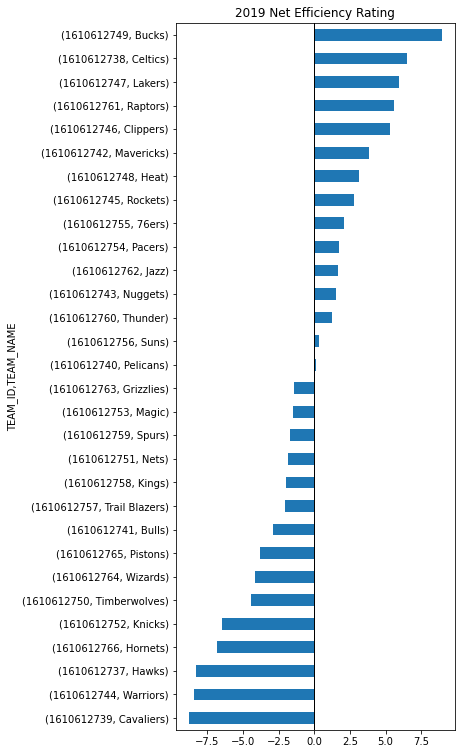

In [40]:
season_cleaned_efficiency.loc[2019].sort_values(by=['NER'])['NER'].plot(kind='barh', figsize=(5, 13), title='2019 Net Efficiency Rating')
plt.axvline(x=0,linewidth=1, color='k')
plt.savefig('C:/Users/User/OneDrive/Desktop/DSIP/NBAproject/graphs/prep/2019EfficiencyRating.png')
plt.show()

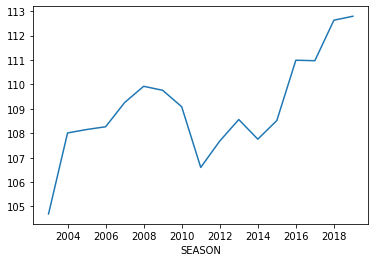

In [41]:
cleaned_efficiency.groupby(['SEASON']).mean()['OER'].loc[2003:2019].plot()

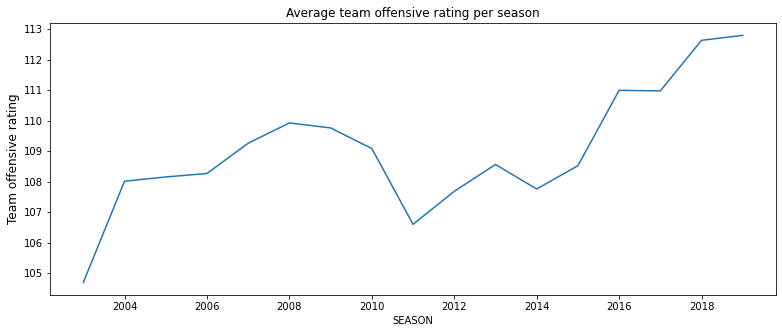

In [43]:
cleaned_efficiency.groupby(['SEASON']).mean().loc[2003:2019]['OER'].plot(title='Average team offensive rating per season', figsize=(13,5))
plt.ylabel('Team offensive rating', fontsize=12)
plt.savefig('C:/Users/User/OneDrive/Desktop/DSIP/NBAproject/graphs/prep/OffensiveRating.png')
plt.show()

# Save dataset

In [42]:
cleaned_efficiency.to_csv(EFFICIENCY_RATING_DATASET, index=False)
cleaned_efficiency.columns, EFFICIENCY_RATING_DATASET

(Index(['GAME_DATE_EST', 'SEASON', 'GAME_ID', 'TEAM_ID', 'HOME', 'FGM', 'FGA',
        'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
        'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'POSSESSIONS',
        'PPP', 'OER', 'OPP_PTS', 'OPP_PPP', 'DER', 'NER', 'TEAM_NAME'],
       dtype='object'),
 'C:/Users/User/OneDrive/Desktop/DSIP/NBAproject/data/processed/110_team_efficiency.csv')

In [43]:
season_cleaned_efficiency.to_csv(TEAM_SEASONAL_EFFICIENCY_DATASET, index=True)
season_cleaned_efficiency.columns, TEAM_SEASONAL_EFFICIENCY_DATASET

(Index(['GAME_ID', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
        'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF',
        'PTS', 'POSSESSIONS', 'PPP', 'OER', 'OPP_PTS', 'OPP_PPP', 'DER', 'NER',
        'CONFERENCE'],
       dtype='object'),
 'C:/Users/User/OneDrive/Desktop/DSIP/NBAproject/data/processed/111_seasonal_efficiency.csv')